次元削減
==================
```{epigraph}
極限まで削ぎ落とした体に、鬼が宿る。

-- JRAキャンペーンCM「The WINNER 天皇賞(春)」
```

ある会社の従業員データを分析しているとします。
3つの特徴量（基本給、ボーナス、総支給額）があり、そこから仕事満足度を予測したいとします。
考えてみると、総支給額はほぼ基本給とボーナスの合計で説明できます。
そこで、**次元削減**が有効です。

予測モデルに3つの特徴量すべてを入れるよりも、総支給額を除いた2つの特徴量を使った方が

- データ量が減少し、ストレージと計算コストが節約できる
- モデルが単純化され、過学習のリスクが低減される
- 2次元で可視化できるようになり、データの解釈が容易になる

という利点があります。

基本給とボーナスの合計と総支給額の間に非常に強い相関があれば、
総支給額を削除しても情報のほとんどが保持されます。

次元削減とは、データの特徴量の数を減らしつつ、
元のデータの本質的な情報をできるだけ保持する手法です。

## 主成分分析（PCA）

主成分分析（PCA: Principal Component Analysis）は、次元削減の代表的な手法の1つです。
PCAは以下のような特徴を持っています。

- 線形変換
  - 元のデータを、互いに直交する新しい軸（主成分）に投影します。

- 分散最大化
  - 最初の主成分は元データの分散を最大化する方向を示し、以降の主成分は前の主成分と直交しつつ残りの分散を最大化します。

- 情報保持
  - 上位の主成分から順に、元データの情報を最大限保持します。

次に、PCAの処理の具体的なイメージを示します。

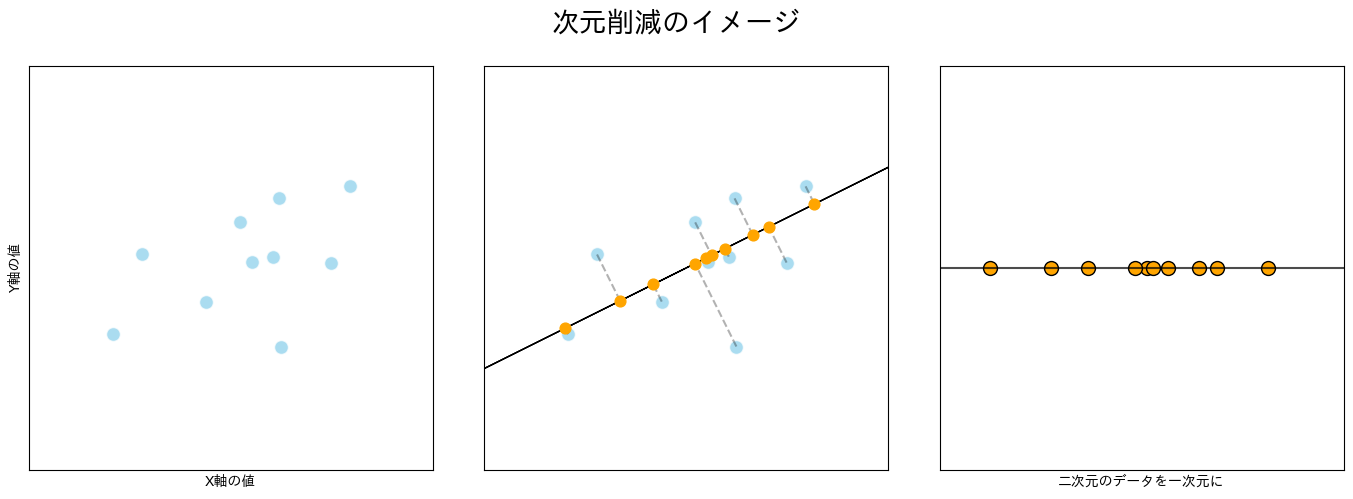

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from sklearn.decomposition import PCA

# データ生成
np.random.seed(42)
n_samples = 10
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
X = np.random.multivariate_normal(mean, cov, n_samples)

# PCA計算
pca = PCA(n_components=2)
pca.fit(X)
transformed = pca.transform(X)
principal_component = pca.components_[0]

# 図の設定
fig = plt.figure(figsize=(14, 5))
fig.suptitle('次元削減のイメージ', fontsize=20, fontweight='bold', y=0.95)

# 元のレイアウトに近づけるために、手動でaxesを作成
axes = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]

# 共通の軸設定
for ax in axes:
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

# 元のデータ表示
axes[0].scatter(X[:, 0], X[:, 1], s=100, alpha=0.7, color='skyblue', edgecolor='white')
axes[0].set_xlabel('X軸の値', fontsize=10)
axes[0].set_ylabel('Y軸の値', fontsize=10)

# 主成分方向と射影を表示
axes[1].scatter(X[:, 0], X[:, 1], s=100, alpha=0.7, color='skyblue', edgecolor='white')

# 主成分ベクトルの矢印描画
v1_length = 5
axes[1].arrow(0, 0, 
              principal_component[0] * v1_length, 
              principal_component[1] * v1_length, 
              head_width=0.3, head_length=0.3, fc='black', ec='black')
axes[1].arrow(0, 0, 
              -principal_component[0] * v1_length, 
              -principal_component[1] * v1_length, 
              head_width=0.3, head_length=0.3, fc='black', ec='black')

# 各点の射影線と射影点
for point in X:
    projection = (np.dot(point, principal_component) * principal_component)
    axes[1].plot([point[0], projection[0]], [point[1], projection[1]], 'k--', alpha=0.3)
    axes[1].scatter(projection[0], projection[1], color='orange', s=60, zorder=3)

# 1次元に射影したデータ
axes[2].scatter(transformed[:, 0], np.zeros(n_samples), s=100, color='orange', edgecolor='black')
axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.7)
axes[2].set_xlabel('二次元のデータを一次元に', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

図の説明をします。
- 左側のグラフ：2次元平面上に散布した青い点（元データ）が示されています。これらのデータポイントは2つの変数（X軸とY軸）で表現されています。
- 中央のグラフ：PCAの過程を示しています。黒い直線は第一主成分を表し、データの分散が最大になる方向を示しています。オレンジ色の点は元の青いデータポイントを主成分軸に射影した結果です。破線は各データポイントから主成分への距離（誤差）を表しています。
- 右側のグラフ：2次元から1次元への次元削減が完了した状態です。すべてのデータポイントが単一の軸（第一主成分）上にオレンジ色の点として表現されています。
  
主成分分析（PCA）は、多次元データから最も情報量の多い方向（主成分）を見つけ出し、データの次元を削減する手法です。
この過程で以下のことが行われます。

- 情報の最大化：PCAはデータの分散が最大となる方向（主成分）を特定します。第一主成分は元データの変動を最も多く捉える方向です。
- データの射影：元のデータポイントを主成分軸に射影することで、高次元のデータを低次元に変換します。
- 次元の削減：図に示されているように、2次元のデータを1次元（直線）に圧縮できます。より複雑なケースでは、例えば100次元のデータを10次元程度に削減することも可能です。
- 情報の保持：PCAは情報の損失を最小限に抑えながら次元を削減します。主成分は元データの分散を最大限に保持するよう選ばれます。

ワインのデータセットを用いてPCAの動作を視覚的に理解しましょう。
ワインデータセットはアルコール量やマグネシウム量などの成分の13個のデータから、ワイン3種の分類を行う問題で使われます。

データを確認するプログラムは以下のようになります。

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=["target"])
df = pd.concat([y, X], axis=1)
df

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


178個のデータがあるようですね。

次に最初の3つの特徴量の組み合わせで散布図を確認してみましょう。

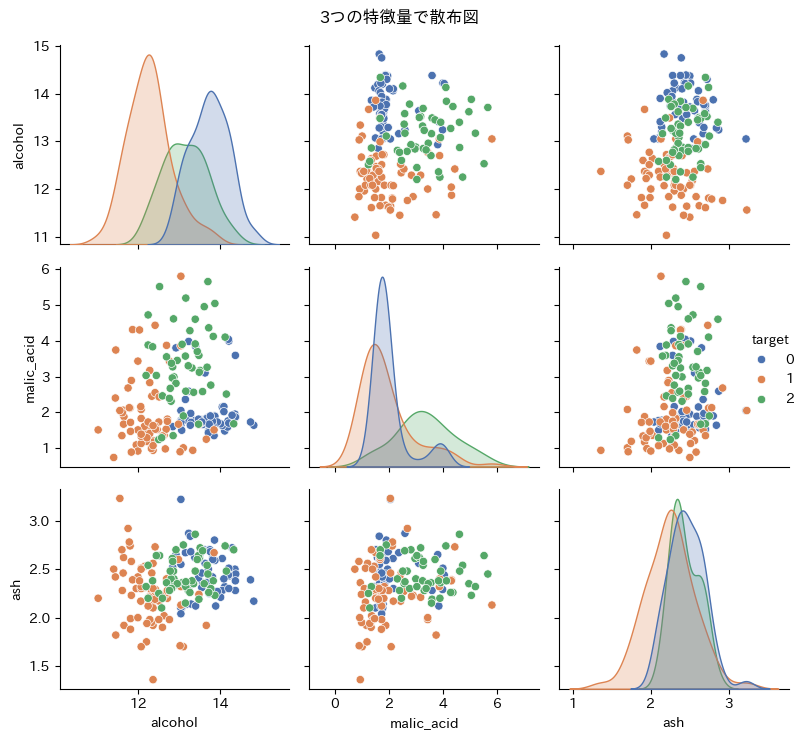

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

sns.pairplot(df.iloc[:, :4], hue='target', palette='deep')
plt.suptitle('3つの特徴量で散布図')
plt.tight_layout()
plt.show()

綺麗に分かれているとは言えませんね。
綺麗に分かれている方が、分類精度も高くなり、なぜそのような分類になったかが説明しやすくなります。

ここで、13個の特徴量からPCAを使って2つの特徴量にしてみましょう。

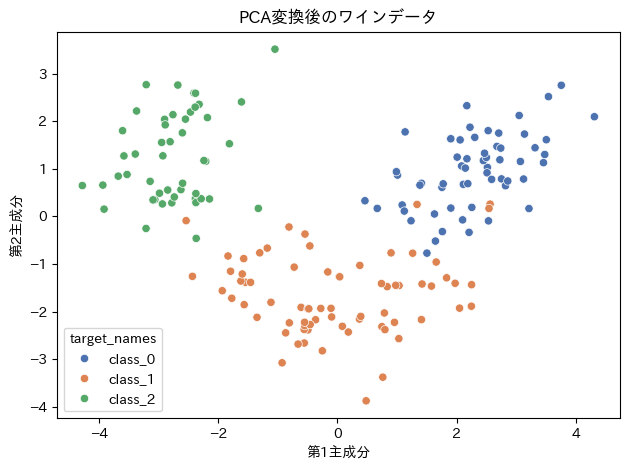

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']
df_pca['target_names'] = df['target'].map(dict(enumerate(wine.target_names)))

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target_names', palette='deep')
plt.title('PCA変換後のワインデータ')
plt.xlabel('第1主成分')
plt.ylabel('第2主成分')
plt.tight_layout()
plt.show()

かなり綺麗に分かれましたね。
PCAの結果を使えば、分類もうまくいきそうですね。

プログラムの説明をします。

4-5行目でデータの標準化を行なっています。
13個の特徴量はそれぞれ値の幅が異なるため、`StandardScaler()`を使って、各特徴量を平均0、分散1にします。
`fit_transform(X)`メソッドは、データXに対して標準化を行います。
この標準化は、異なるスケールの特徴量がPCAに与える影響を均等にするために重要な工程になります。

7-8行目でPCAを行なっています。
`PCA(n_components=2)`は、データを2次元に削減するPCAモデルになります。
`fit_transform(X_scaled)`メソッドは、標準化されたデータに対してPCAを適合させ、そのPCA変換を適用します。
結果として、元の13次元のデータが2次元に削減され、`X_pca`に代入されます。

## t-SNE (t-Distributed Stochastic Neighbor Embedding) 

次元削減の方法として、PCA以外の手法として、t-SNEがあります。
t-SNEは、高次元データを低次元に変換する非線形の次元削減手法です。
PCAが線形変換であるのに対し、t-SNEは非線形の変換を行います。
これにより、より複雑なデータ構造や関係性を表現できます。

t-SNEの基本原理は「似ているデータ同士を近くに、異なるデータ同士を遠くに配置する」というものです。
高次元空間での距離関係を確率分布として捉え、その分布をできるだけ保存するように低次元空間へ写像します。
この特性により、クラスター構造の可視化に特に優れています。

PCAは各主成分が元の特徴量の線形結合として解釈でき、結果の解釈が容易です。
一方、t-SNEは結果の解釈が難しく、視覚化のために主に使用されます。
そのため、クラスタリング結果の可視化や複雑なデータセットの探索的分析で用いられます。

計算コストの面でもPCAとt-SNEには違いがあります。
t-SNEはPCAよりも計算コストが高く、特に大規模なデータセットでは処理時間が長くなる傾向があります。
そのため、実務では「まずPCAで全体像を把握し、その後t-SNEでより詳細な構造を探る」という段階的なアプローチがよく取られます。

では、t-SNEを使ってワインデータを可視化してみましょう。

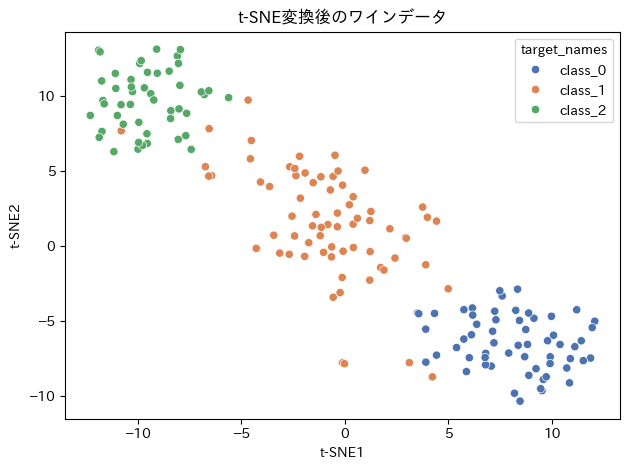

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = df['target']
df_tsne['target_names'] = df['target'].map(dict(enumerate(wine.target_names)))

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='target_names', palette='deep')
plt.title('t-SNE変換後のワインデータ')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.tight_layout()
plt.show()

PCAの結果とは異なっていますが、こちらも綺麗に分かれていますね。

プログラムの説明をします。

3-4行目でt-SNEの適用をしています。
`TSNE(n_components=2, random_state=42)`は2次元のt-SNEモデルになります。
`random_state=42`は結果の再現性のために設定しています。
`fit_transform(X_scaled)` メソッドで標準化されたデータにt-SNEを適用し、2次元に削減します。